# 第三題 (30 分)

使用 Pandas 套件，匯入網路資源提供的學生學測資料 (https://bitly.com/gradescsv) ，進行以下分析（每小題 5 分）：

1. 增加新的一欄 "總級分"，為國文、英文、數學與自然四科成績的總和，但不加入社會科成績。列出五筆數據以檢查是否正確。
2. 增加新的一欄 "主科", 其計算方式為英文成績 + 1.5 倍的數學成績 + 自然成績。列出五筆數據以檢查是否正確。
3. 以適當的區間，分別繪出總級分與主科的長條圖 (又稱直方圖，histogram)。
4. 計算主科與總級分的相關係數。
5. 將成績表排序，排序規則為先以主科排序、主科若同分再以總級分排序，由大排到小。列出前十筆數據。
6. 使用快篩法，依照前述排序，列出所有主科大於等於 47 分，且總級分大於等於 50 分的名單。

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv('https://bitly.com/gradescsv') 

In [11]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


In [16]:
df['總級分'] = df[['國文','英文','數學','自然']].sum(axis=1)

In [17]:
df['主科'] = df.英文 + df.數學 * 1.5 + df.自然

In [18]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,主科
0,劉俊安,9,10,15,10,13,44,42.5
1,胡玉華,10,10,10,8,9,38,33.0
2,黃淑婷,13,15,8,11,14,47,38.0
3,陳上紫,10,10,8,9,14,37,31.0
4,崔靜成,13,12,14,12,13,51,45.0


In [19]:
df.sort_values(by = ['主科', '總級分'], ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,主科
83,李士賢,10,14,15,13,13,52,49.5
57,胡淳茜,12,15,14,13,11,54,49.0
68,劉麗芬,8,14,14,14,14,50,49.0
66,邱盈俊,10,14,14,13,8,51,48.0
37,曾怡君,11,12,15,13,14,51,47.5
64,俞志峰,9,14,13,14,15,50,47.5
76,周育霖,9,12,15,13,12,49,47.5
25,蔡亦瑄,13,13,14,13,12,53,47.0
87,趙偉希,10,13,14,13,15,50,47.0
80,施雅鈴,13,15,12,13,13,53,46.0


<AxesSubplot:>

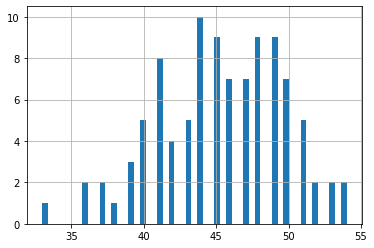

In [34]:
df.總級分.hist(bins=53)

<AxesSubplot:>

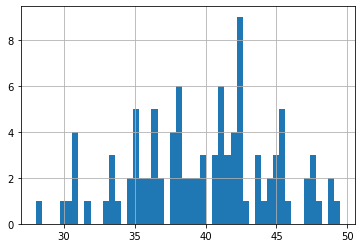

In [31]:
df.主科.hist(bins=50)

In [35]:
df.主科.corr(df.總級分)

0.8251619252881761

In [38]:
df2 = df[(df.總級分 >= 50) & (df.主科 >= 47)]

In [39]:
df2.sort_values(by =['主科', '總級分'], ascending=False)

,姓名,國文,英文,數學,自然,社會,總級分,主科
83,李士賢,10,14,15,13,13,52,49.5
57,胡淳茜,12,15,14,13,11,54,49.0
68,劉麗芬,8,14,14,14,14,50,49.0
66,邱盈俊,10,14,14,13,8,51,48.0
37,曾怡君,11,12,15,13,14,51,47.5
64,俞志峰,9,14,13,14,15,50,47.5
25,蔡亦瑄,13,13,14,13,12,53,47.0
87,趙偉希,10,13,14,13,15,50,47.0
